# Further EDA

Having established the word corpus and examined the stopwords, we can continue to explore the differences between the classes. One specific way to do this is via wordcloads: objects that visualize words based on their frequency. Building upon the previous notebooks, this notebook generates wordclouds to try and visually depict which words are frequently used by which characters.<br>
<br>
Naturally, the first step is to set up the corpus.

In [4]:
# Load in the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
# Set up the data
lines = pd.read_csv('../data/All-seasons.csv')

lines = lines[lines.Season != 'Season']

lines[['Season', 'Episode']] = lines[['Season', 'Episode']].astype('int64')

support_chars = ['Mr. Garrison', 'Chef', 'Sharon',\
                 'Mr. Mackey', 'Gerald', 'Liane', 'Sheila',\
                 'Stephen', 'Ms. Garrison', 'Mrs. Garrison']

lines.loc[lines.Character.isin(support_chars), 'Character'] = 'Support Character'

final_labels = ['Cartman', 'Stan', 'Kyle', 'Butters', 'Randy', 'Support Character']

lines_final = lines[lines.Character.isin(final_labels)]

<b>Corpus</b>

In [6]:
import re

corpus = lines_final.Line.tolist()

for line in range(len(corpus)):
    corpus[line] = re.sub('\\n', '', corpus[line].rstrip())    

<b>Line output by season</b><br>
One thing I was curious about was how the number of lines per character increases or decreases as the seasons increase. Below is a plot comparing the different character outputs. 

In [12]:
# Creating a dictionary of line counts. Each key is a character and the values are lists.
line_counts = {}

for char in final_labels:
    count_list = []
    line_counts[char] = count_list
    subset = lines_final[lines_final.Character == char]
    for i in range(1,19):
        count_list.append(len(subset[subset.Season == i]))        

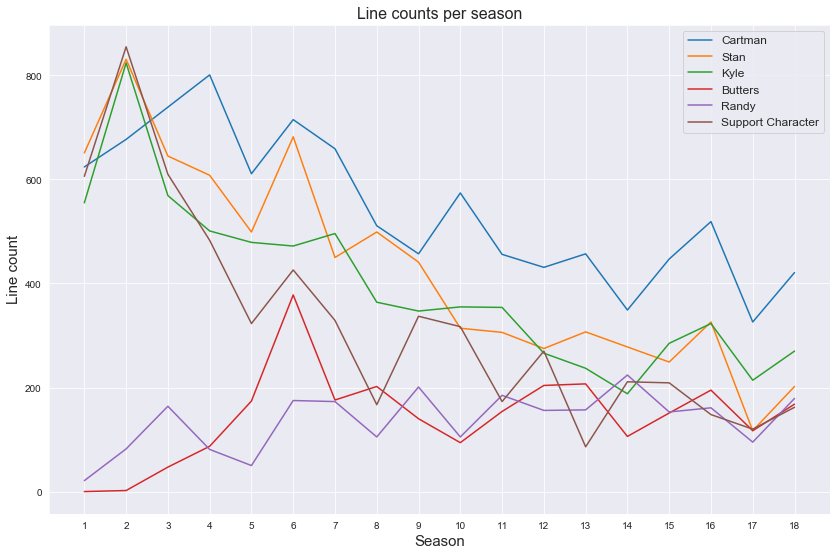

In [28]:
fig = plt.subplots(figsize=(14,9))

for label in final_labels:
    _ = sns.lineplot(x=np.arange(1,19,1), y=line_counts[label], label = label)
_ = plt.legend(fontsize=12)
_ = plt.xticks(np.arange(1,19,1))
_ = plt.xlabel('Season', fontsize=15)
_ = plt.ylabel('Line count', fontsize=15)
_ = plt.title('Line counts per season', fontsize=16)

By the third season, Cartman is consistently the most prominent character. It's also interesting to see the rise of Butters and Randy as the show progresses. By the last seasons they are practically even with Stan, who is a main character. There also seems to be a general decrease overall, which is likely attributable to fewer episodes per season. 

### Word Clouds

Beyond simple line counts, word clouds are a useful way to visualize word frequencies. This is useful because it helps show how certain characters might favor certain words, illustrating differences in dialogue. <br>
<br>
Below is a basic word cloud for the full data set.

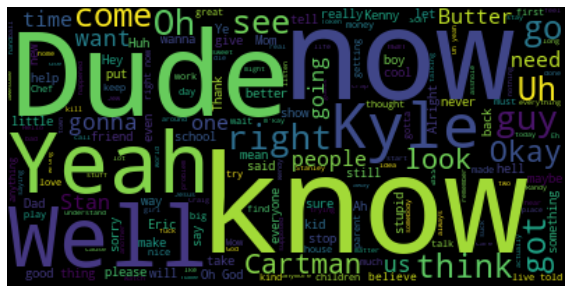

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(corpus))

fig = plt.subplots(figsize=(10,8))
_ = plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')

Now to remove the stopwords and clean it up a little.

In [47]:
stop_words = ['you', 'the', 'i', 'to', 'a', 'and', 'it', 'that',\
              'we', 'is', 'of', 'what', 'this', 'in', 'have', 'all',\
              'just', 'do', 'for', "don't", 'are', 'be', "it's", 'get',\
              'but', 'with', 'know', 'so', 'go', 'can', 'right', 'out',\
              'like', 'was', 'gonna', "that's", 'here', 'up', 'about', \
              "you're", 'he', 'come', 'they', 'okay', 'see', 'our',\
              'how', 'if', 'think', 'at', 'us', "can't", "we're", 'got',\
              'there', 'look', 'did', 'why', 'then', 'him', 'time',\
              'back', 'one', 'going', 'want', 'who', "he's", 'from', \
              'some', 'his', 'will', 'need', 'make', 'take', 'yes',\
              "let's", 'because', 'them', 'has', 'as', "what's",\
              "there's", 'too', 'an', 'when', 'been', 'where', 'or',\
              'were', 'had', "they're", 'her', 'by', 'their', 'those',\
              'she', 'these', 'any', 'into', "we've", 'two','does',\
              'much', 'being', 'am', 'than', 'on']

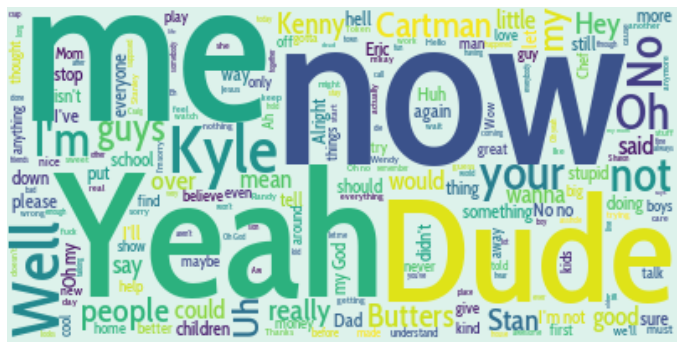

In [48]:
font_path = '../data/CabinCondensed-Medium.ttf'

wordcloud = WordCloud(stopwords=stop_words,\
                      font_path=font_path,\
                      random_state=2,\
                     normalize_plurals=False,\
                     background_color='#ddf2eb').generate(str(corpus))

fig = plt.subplots(figsize=(12,11))
_ = plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')

<b>Character Word Clouds</b><br>
Now, we can create a function to generate a word cloud for a specific character.

In [49]:
def character_cloud(character):
    
    subset = lines_final[lines_final.Character == character]
    
    sub_corp = subset.Line.tolist()
    for line in range(len(sub_corp)):
        sub_corp[line] = re.sub('\\n', '', sub_corp[line].rstrip())
        
    char_cloud = WordCloud(stopwords=stop_words,\
                           font_path=font_path,\
                           random_state=2,\
                           normalize_plurals=False,\
                           background_color='#ddf2eb').generate(str(sub_corp))
    
    fig = plt.subplots(figsize=(10,8))
    _ = plt.imshow(char_cloud, interpolation='bilinear')
    _ = plt.axis('off')
    _ = plt.title(character, fontsize=27)

With the function defined, creating individual word clouds helps visualize which words are more commonly used by which characters.

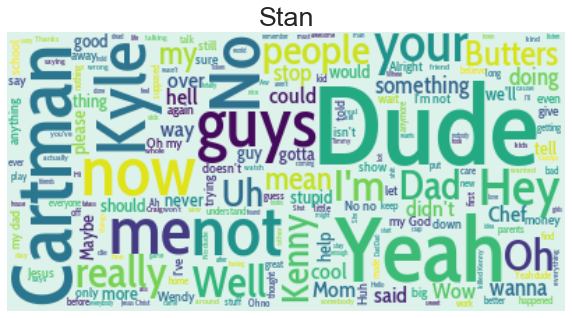

In [50]:
character_cloud('Stan')

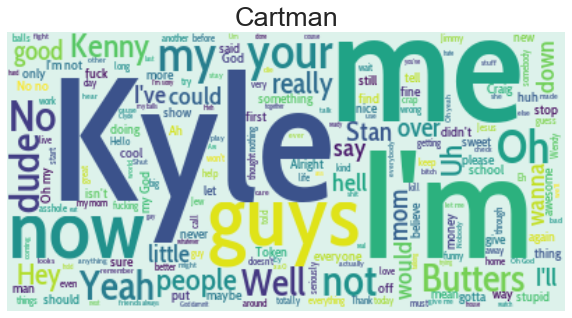

In [51]:
character_cloud('Cartman')

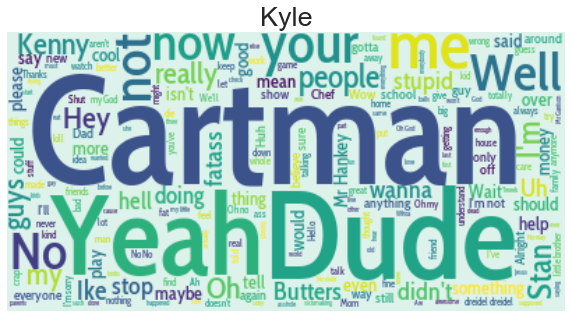

In [52]:
character_cloud('Kyle')

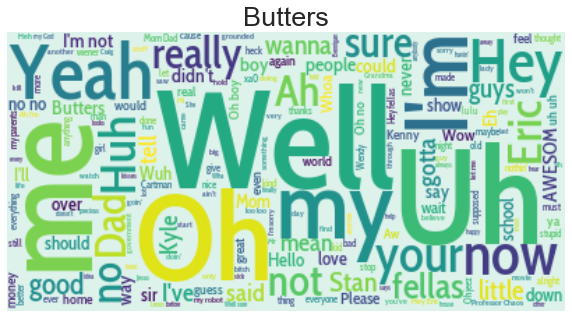

In [53]:
character_cloud('Butters')

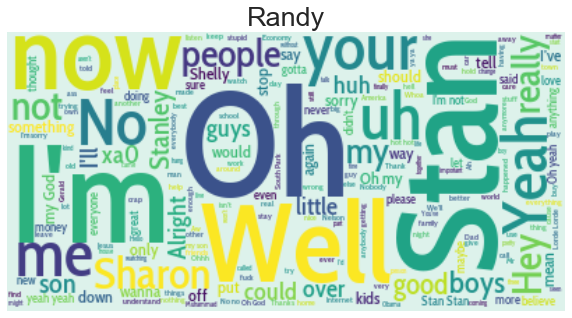

In [54]:
character_cloud('Randy')

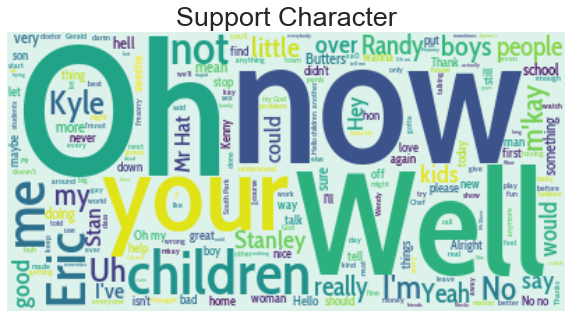

In [55]:
character_cloud('Support Character')

I think it's funny to see how Cartman and Kyle put so much emphasis on each other's name (usually in anger), while Stan seems a bit egalitarian. For Butters, the prominence of words like 'oh', 'uh' and 'ah' seems to adequately portray his indecisive nature. 